<a href="https://colab.research.google.com/github/Trace-dap-troai/Chapter-2-Individual-Exercise-2/blob/main/individual2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [6]:
iris = load_iris()
X = iris.data
y = iris.target


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


We split the dataset into training and testing sets to evaluate model performance on unseen data.

In [8]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


#Gradient Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)



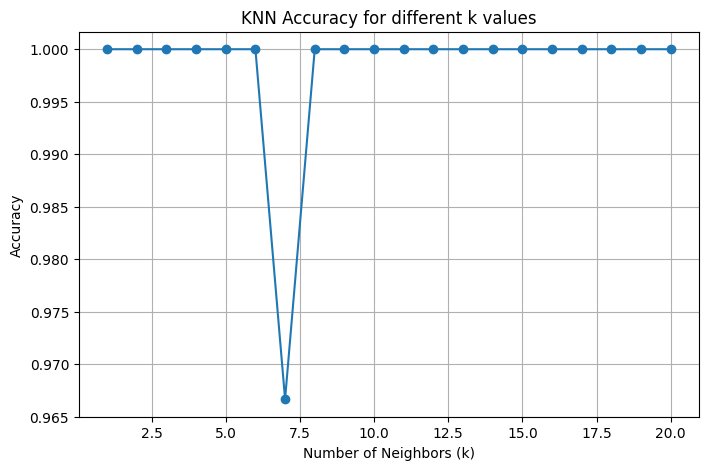

In [9]:
#K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

#Plot performance vs k

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for different k values")
plt.grid(True)
plt.show()


The optimal value of k is the one that achieves the highest accuracy on the test set.

In [10]:
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='macro'),
        "Recall": recall_score(y_true, y_pred, average='macro'),
        "F1-score": f1_score(y_true, y_pred, average='macro')
    }


In [11]:
results = pd.DataFrame({
    "Decision Tree": evaluate_model(y_test, y_pred_dt),
    "Random Forest": evaluate_model(y_test, y_pred_rf),
    "Gradient Boosting": evaluate_model(y_test, y_pred_gb),
    "KNN (best k)": evaluate_model(
        y_test,
        KNeighborsClassifier(n_neighbors=np.argmax(accuracies)+1)
        .fit(X_train, y_train)
        .predict(X_test)
    )
}).T

results


,Accuracy,Precision,Recall,F1-score
Decision Tree,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0
Gradient Boosting,1.0,1.0,1.0,1.0
KNN (best k),1.0,1.0,1.0,1.0


KNN performance strongly depends on the choice of k